In [24]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]
sys.path.append("../")
from utils import reduce_channel_batch, interpolate_signals

### Conv VAE Neural Fill

Conv VAE with 3 channel input and 1 channel output

In [86]:
samples = np.load("../denoise/results_denoise/1c_conv_fill_eval_1000.npy")
sample_idx = 14
sample = samples[sample_idx]

original = sample[:3, :]
reconstructed = np.expand_dims(sample[3], 0)
estimated = np.expand_dims(interpolate_signals(sample[0], sample[1]), 0)
target_channel = np.expand_dims(original[1], 0)
all_versions = np.squeeze(np.stack([estimated, reconstructed, target_channel]))

#### All on Same Plot

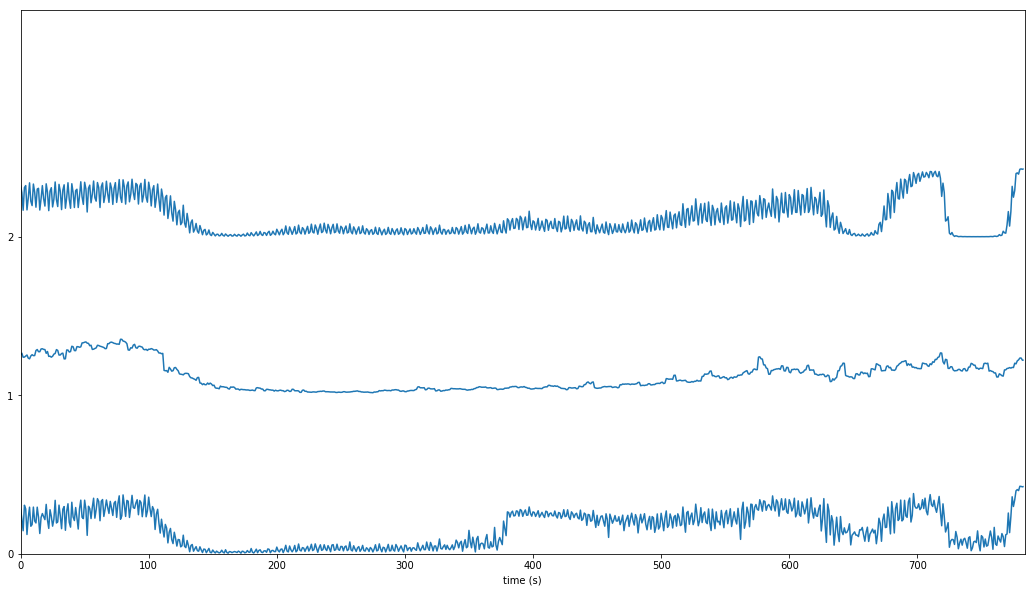

In [87]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(all_versions, yscale=.3)
# 1st is original, 2nd is VAE, 3rd is Inerpolation

#### Original

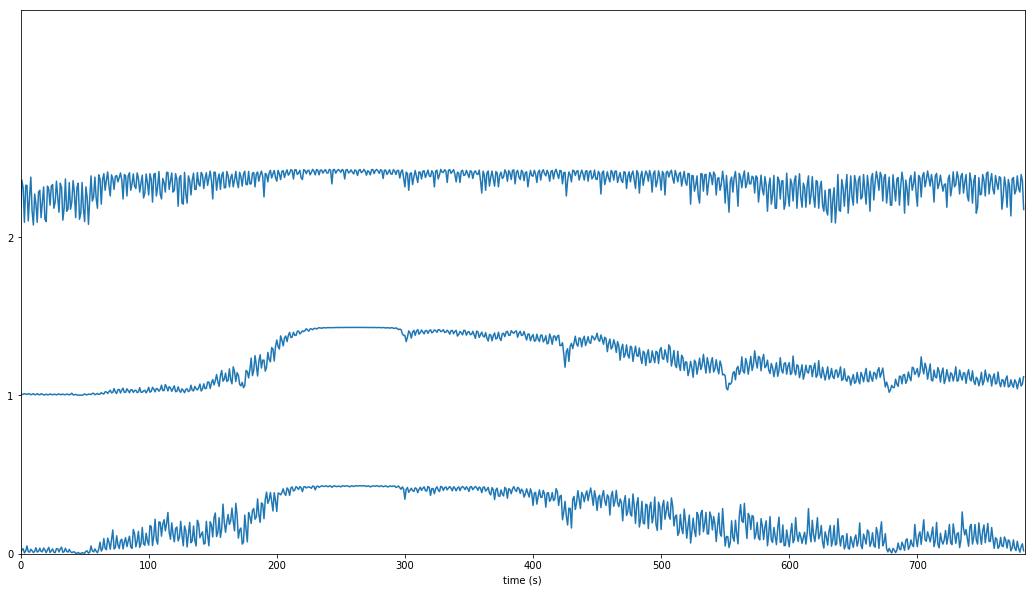

In [73]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(original, yscale=.3)
# middle channel is target channel

#### Fill by VAE

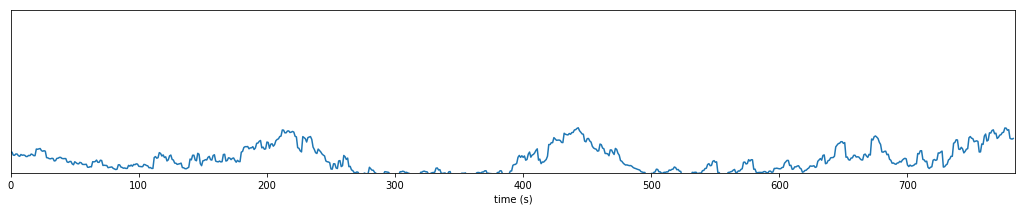

In [67]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(reconstructed, yscale=.3)

#### Fill by Interpolation

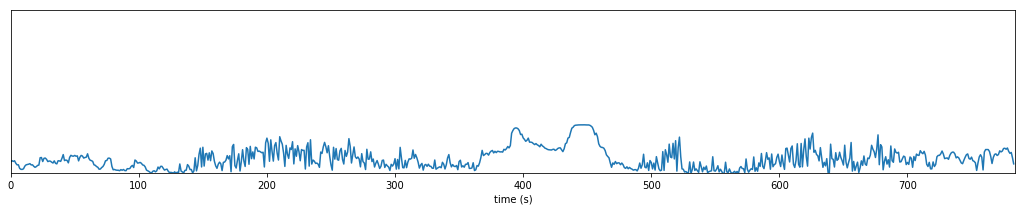

In [68]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(estimated, yscale=.3)